In [2]:
# 先写出一个语法规则
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [3]:
import random
# random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]      # test

In [4]:
# 定义一个adj的随机

def adj():
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
    

In [5]:
def adj_star():
    return random.choice([lambda:'',lambda:adj()+adj_star()])()
    

In [6]:
adj_star()

''

In [24]:
# 生成语法树

def create_grammer(grammer_str,split = '=>',line_split = '\n'):
    grammer = {}
    for line in grammer_str.split(line_split):   # 按行读取
        # print(line)
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammer[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammer
    
    

In [26]:
example_grammar = create_grammer(simple_grammar)

In [111]:
# 随机生成句子
import random
choice = random.choice
def generate(gram,target):
    if target not in gram:
        return target
    # print(gram[target])
    expaned = [generate(gram,t) for t in choice(gram[target])]
    # print(expaned)
    
    return ''.join([e if e!='/n' else '\n' for e in expaned if e != 'null'])

    
    

In [28]:
generate(gram=example_grammar,target='sentence')

'这个蓝色的篮球坐在一个蓝色的桌子'

In [29]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [130]:
for i in range(20):
    result = generate(gram=create_grammer(host,split='='),target = 'host')
    print(result)

先生,你好我是8号,请问你要赌博吗？
您好我是28号,您需要打牌吗？
您好我是7号,请问你要喝酒吗？
您好我是5号,请问你要喝酒吗？
先生,你好我是93号,您需要喝酒吗？
你好我是811号,您需要打牌吗？
您好我是9号,您需要打牌吗？
你好我是8号,请问你要打猎吗？
小朋友,您好我是4号,您需要打牌吗？
小朋友,您好我是4958号,请问你要喝酒吗？
先生,您好我是69号,请问你要赌博吗？
您好我是1号,请问你要打猎吗？
你好我是4号,请问你要赌博吗？
你好我是8号,您需要打牌吗？
女士,您好我是1号,请问你要喝酒吗？
小朋友,您好我是9号,请问你要喝酒吗？
先生,您好我是942号,您需要赌博吗？
你好我是17号,您需要喝酒吗？
小朋友,你好我是18号,请问你要赌博吗？
女士,你好我是6号,您需要打牌吗？


In [32]:
# 制定一个语法规则，当数据变换了，程序不需要重写

In [35]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [36]:
print(generate(create_grammer(programming,split='=>'),target = 'stmt'))

while(info1){
....if(database2){
....while(databasedatabase1){
....while(student1){
....database3=databasename2}}}}


In [37]:
import pandas as pd
content = pd.read_csv(r'E:/learn/NLP/jupyters_and_slides-master/2019-summer/article_9k.txt',header=None,encoding='utf-8')

In [38]:
content.columns = ['Content']

In [39]:
articles = content['Content'].tolist()

In [40]:
articles

['此外自本周6月12日起除小米手机6等15款机型外其余机型已暂停更新发布含开发版体验版内测稳定版暂不受影响以确保工程师可以集中全部精力进行系统优化工作有人猜测这也是将精力主要用到MIUI9的研发之中MIUI8去年5月发布距今已有一年有余也是时候更新换代了当然关于MIUI9的确切信息我们还是等待官方消息',
 '骁龙835作为唯一通过Windows10桌面平台认证的ARM处理器高通强调不会因为只考虑性能而去屏蔽掉小核心相反他们正联手微软找到一种适合桌面平台的兼顾性能和功耗的完美方案报道称微软已经拿到了一些新的源码以便Windows10更好地理解biglittle架构资料显示骁龙835作为一款集成了CPUGPU基带蓝牙WiFi的SoC比传统的Wintel方案可以节省至少30的PCB空间按计划今年Q4华硕惠普联想将首发骁龙835Win10电脑预计均是二合一形态的产品当然高通骁龙只是个开始未来也许还能见到三星Exynos联发科华为麒麟小米澎湃等进入Windows10桌面平台',
 '此前的一加3T搭载的是3400mAh电池DashCharge快充规格为5V4A至于电池缩水可能与刘作虎所说一加手机5要做市面最轻薄大屏旗舰的设定有关按照目前掌握的资料一加手机5拥有55寸1080P三星AMOLED显示屏6G8GBRAM64GB128GBROM双1600万摄像头备货量惊喜根据京东泄露的信息一加5起售价是xx99元应该是在279928992999中的某个',
 '这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车新华社记者张立云摄',
 '原标题44岁女子跑深圳约会网友被拒暴雨中裸身奔走深圳交警微博称昨日清晨交警发现有一女子赤裸上身行走在南坪快速上期间还起了轻生年头一辅警发现后赶紧为其披上黄衣并一路劝说她那么事发时到底都发生了些什么呢南都记者带您一起还原现场南都记者在龙岗大队坂田中队见到了辅警刘青发现女生的辅警一位外表高大帅气说话略带些腼腆的90后青年刘青介绍6月16日早上7时36分他正在环城南路附近值勤接到中队关于一位女子裸身进入机动车可能有危险的警情随后骑着小铁骑开始沿路寻找大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子女子身上一丝不挂地逆车流而行时走时停时坐时躺险象环生刘青停好小铁骑和另外一名巡防员追了上去发现女子的情绪很低落话不多刘青尝试

In [42]:
import jieba
import re

In [43]:
articles[110]

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [45]:
from collections import Counter
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LuoGU\AppData\Local\Temp\jieba.cache
Loading model cost 1.810 seconds.
Prefix dict has been built succesfully.


In [46]:
with_jieba_cut.most_common()[:10]

[('的', 73),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('在', 10),
 ('自治区', 9),
 ('麦田', 8),
 ('队员', 8)]

In [47]:
def token(string):
    return re.findall('\w+',string)

In [91]:
def cut(string):
    return jieba.cut(string)

In [49]:
TOKEN = []

In [50]:
for i, line in enumerate((open(r'E:/learn/NLP/jupyters_and_slides-master/2019-summer/article_9k.txt',encoding='utf-8'))):
    if i % 100 == 0: print(i)
    
      
    TOKEN += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [51]:
words_count = Counter(TOKEN)

In [52]:
words_count.most_common()

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [53]:
frequiences = [f for w,f in words_count.most_common(100)]

In [54]:
x = [i for i in range(100)]

In [55]:
%matplotlib inline

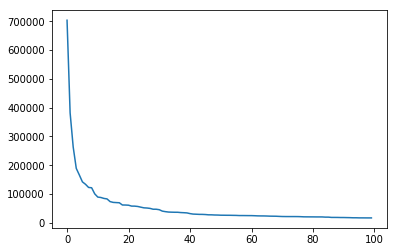

In [56]:
import matplotlib.pyplot as plt
plt.plot(x,frequiences)

In [57]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [58]:
# 去除停用词
def stopwords_list():
    stopwords = [line.strip() for line in open(r'E:/summary_doc/ML/data/stopwords.txt',encoding='UTF-8').readlines()]
    return stopwords

In [59]:
stopwords = stopwords_list()
final_TOKEN = []
for word in TOKEN:
    if word not in stopwords:
        if word != '\t':
            final_TOKEN.append(word)
           
    

KeyboardInterrupt: 

In [60]:
def prob_1(word):
    return words_count[word]/len(TOKEN)

In [61]:
prob_1('我们')

0.0011341645999654677

In [63]:
prob_1('新华社')

0.00808604530278653

In [64]:
TOKEN = [str(t) for t in TOKEN]

In [65]:
TOKEN[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [69]:
# 将两个词连起来
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

In [70]:
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [71]:
words_counts_2 = Counter(TOKEN_2_GRAM)

In [72]:
words_counts_2.most_common()

[('\n新华社', 69033),
 ('2017年', 61480),
 ('外代二线', 61301),
 ('n新华社', 59794),
 ('日n', 52216),
 ('新华社照片', 50401),
 ('5月', 37977),
 ('4月', 34571),
 ('新华社记者', 30864),
 ('２０', 27166),
 ('日在', 27154),
 ('年5', 25433),
 ('n当日', 25241),
 ('年4', 23727),
 ('n外代', 20854),
 ('照片外代', 20777),
 ('比赛中', 20637),
 ('外代2017', 20463),
 ('n5月', 20426),
 ('n4月', 19920),
 ('n体育', 19274),
 ('一带一路', 18299),
 ('n\n', 17778),
 ('００', 17675),
 ('０１', 17388),
 ('6月', 16936),
 ('当日在', 16381),
 ('摄\n', 14783),
 ('１０', 12838),
 ('日电记者', 11598),
 ('完\n', 11246),
 ('二线足球', 11039),
 ('在比赛', 9796),
 ('举行的', 9547),
 ('５月', 8599),
 ('４月', 8314),
 ('１６', 8027),
 ('１７', 7891),
 ('n在', 7609),
 ('2016年', 7571),
 ('月1', 7307),
 ('也是', 7122),
 ('月１', 7060),
 ('１２', 7009),
 ('月２', 6925),
 ('新华社欧新', 6875),
 ('20162017赛季', 6774),
 ('３０', 6754),
 ('１１', 6699),
 ('更多', 6642),
 ('年6', 6637),
 ('１５', 6631),
 ('１９', 6406),
 ('比0', 6274),
 ('1日', 6268),
 ('新华社法新', 6172),
 ('新华社北京', 6138),
 ('的是', 6079),
 ('二线网球', 5930),
 ('n国际', 5712),
 ('新华

In [73]:
# 查看两个词的概率
def prob_2(word1,word2):
    if word1+word2 in words_counts_2:
        return words_counts_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [76]:
prob_2('要','吃饭')

5.6759319823555707e-08

In [79]:
prob_2('在','外国')

6.811118378826685e-07

In [78]:
prob_2('我们', '在')

3.0536514065072974e-05

In [96]:
def cut(string): return list(jieba.cut(string))

In [127]:
# 运用n-gram模型，计算句子的概率
def prob_sentence(sentence):
    # 对句子进行分词
    words = cut(sentence)
    print(words)
    sentence_prob=1
    # 计算概率
    for i,word in enumerate(words[:-1]):
        next_ = words[i+1]
        proba = prob_2(word,next_)/prob_1(word)
        
        sentence_prob *=proba
    return sentence_prob

In [128]:
print(prob_sentence('我喜欢自然语言处理'))

['我', '喜欢', '自然语言', '处理']
8.901893678377734e-07


In [129]:
prob_sentence('小明今天抽奖抽到一台苹果手机')

['小明', '今天', '抽奖', '抽到', '一台', '苹果', '手机']


5.2059563993119765e-12

In [131]:
# 随机生成多个句子
import random
choice = random.choice
def generate_n(gram,target,n):
    if target not in gram:
        return target
    # print(gram[target])
    sent_list=[]
    for i in range(n):        
        expaned = [generate(gram,t) for t in choice(gram[target])]
        content = ''.join([e if e!='/n' else '\n' for e in expaned if e != 'null'])
        sent_list.append(content)
    # print(expaned)    
    return sent_list

In [132]:
generate_n(gram=example_grammar,target='sentence',n=5)

['一个蓝色的好看的篮球看见一个蓝色的女人',
 '这个蓝色的篮球看见一个蓝色的好看的蓝色的女人',
 '这个桌子看着这个好看的篮球',
 '这个桌子坐在一个桌子',
 '这个蓝色的桌子坐在这个蓝色的小猫']